<a href="https://colab.research.google.com/github/IsfaquethedataAnalyst/Data_visualization/blob/main/Housing_Marketing_Analyst_Using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("dplyr")
install.packages("car")
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
library(ggplot2)
library(dplyr)
library(car)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




In [4]:
# Load data
data <- read.csv("housing.csv")

In [6]:
str(data)

'data.frame':	10 obs. of  6 variables:
 $ X                  : int  0 1 2 3 4 5 6 7 8 9
 $ Crime.Rate         : int  40 35 42 38 30 45 48 32 41 37
 $ Average.Rooms      : int  5 4 6 5 3 7 8 4 5 6
 $ Highway.Access     : int  1 0 1 0 1 0 1 0 1 0
 $ Pupil.Teacher.Ratio: int  20 18 22 19 15 25 28 16 20 17
 $ Median.Home.Value  : int  250000 220000 280000 240000 180000 300000 350000 200000 260000 230000


In [7]:
summary(data)

       X          Crime.Rate    Average.Rooms  Highway.Access
 Min.   :0.00   Min.   :30.00   Min.   :3.00   Min.   :0.0   
 1st Qu.:2.25   1st Qu.:35.50   1st Qu.:4.25   1st Qu.:0.0   
 Median :4.50   Median :39.00   Median :5.00   Median :0.5   
 Mean   :4.50   Mean   :38.80   Mean   :5.30   Mean   :0.5   
 3rd Qu.:6.75   3rd Qu.:41.75   3rd Qu.:6.00   3rd Qu.:1.0   
 Max.   :9.00   Max.   :48.00   Max.   :8.00   Max.   :1.0   
 Pupil.Teacher.Ratio Median.Home.Value
 Min.   :15.00       Min.   :180000   
 1st Qu.:17.25       1st Qu.:222500   
 Median :19.50       Median :245000   
 Mean   :20.00       Mean   :251000   
 3rd Qu.:21.50       3rd Qu.:275000   
 Max.   :28.00       Max.   :350000   

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


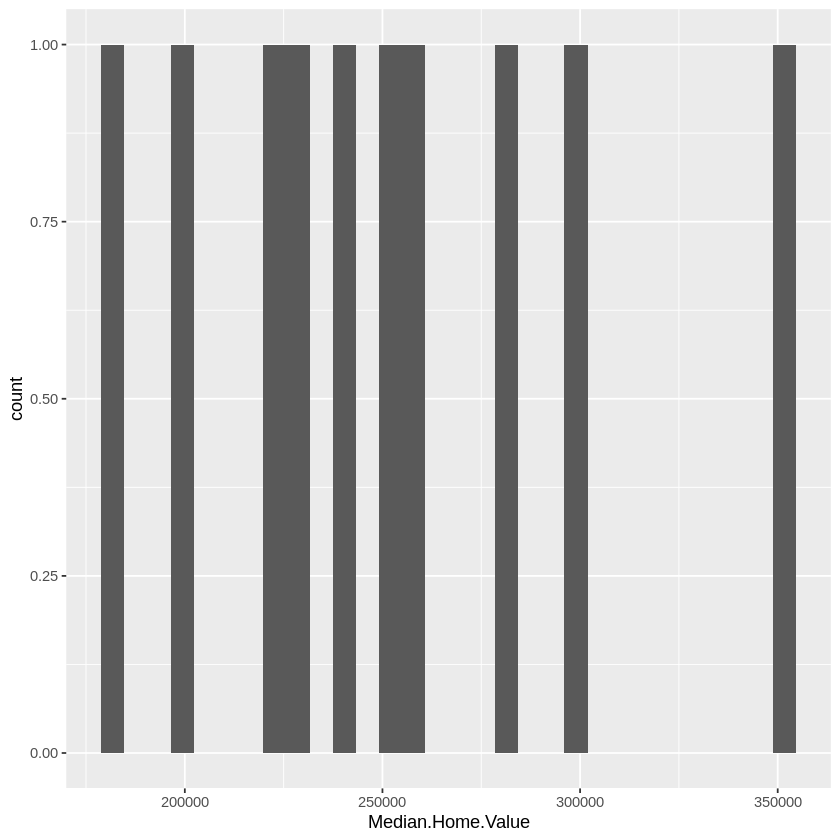

In [8]:
ggplot(data, aes(x = Median.Home.Value)) +
  geom_histogram()

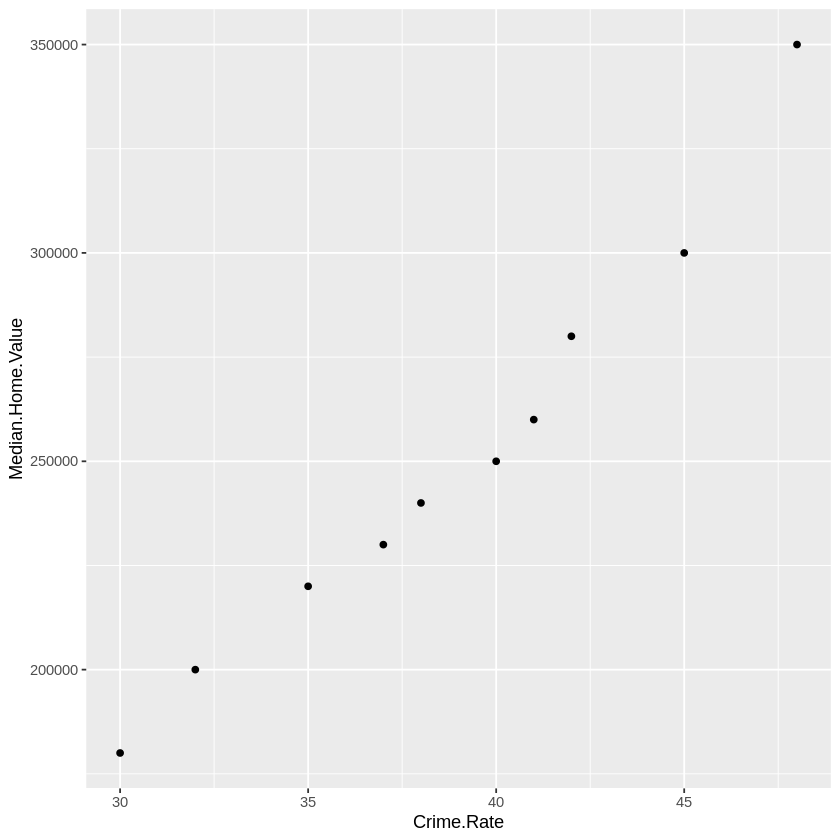

In [9]:
ggplot(data, aes(x = Crime.Rate, y = Median.Home.Value)) +
  geom_point()

Warning message:
“Continuous x aesthetic
ℹ did you forget `aes(group = ...)`?”


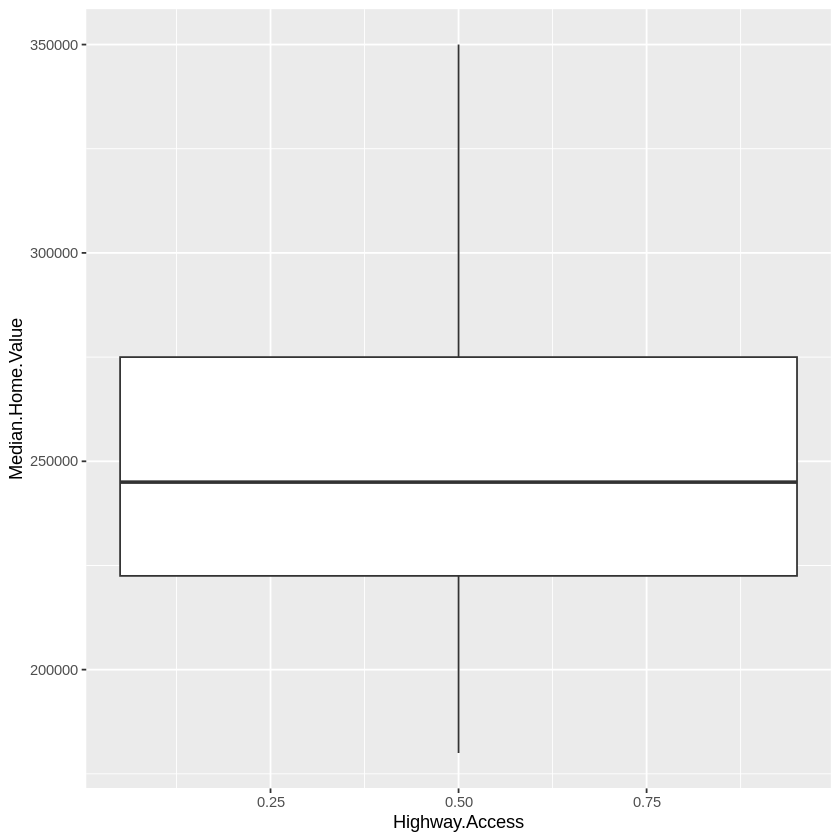

In [10]:
ggplot(data, aes(x = Highway.Access, y = Median.Home.Value)) +
  geom_boxplot()

In [11]:
sum(is.na(data))

[1] 0

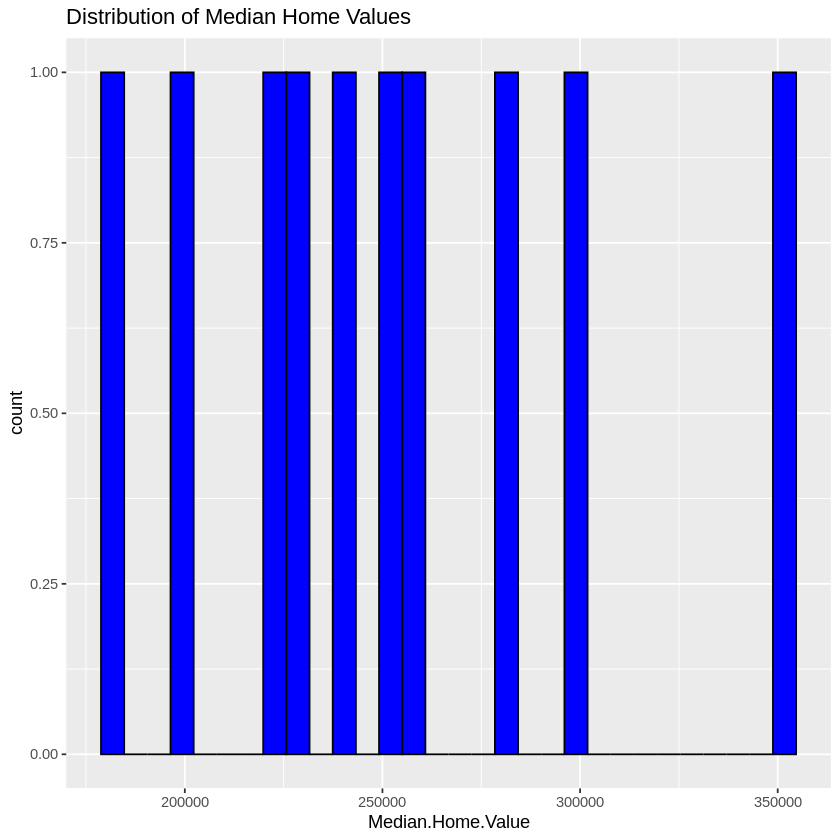

ERROR: ignored

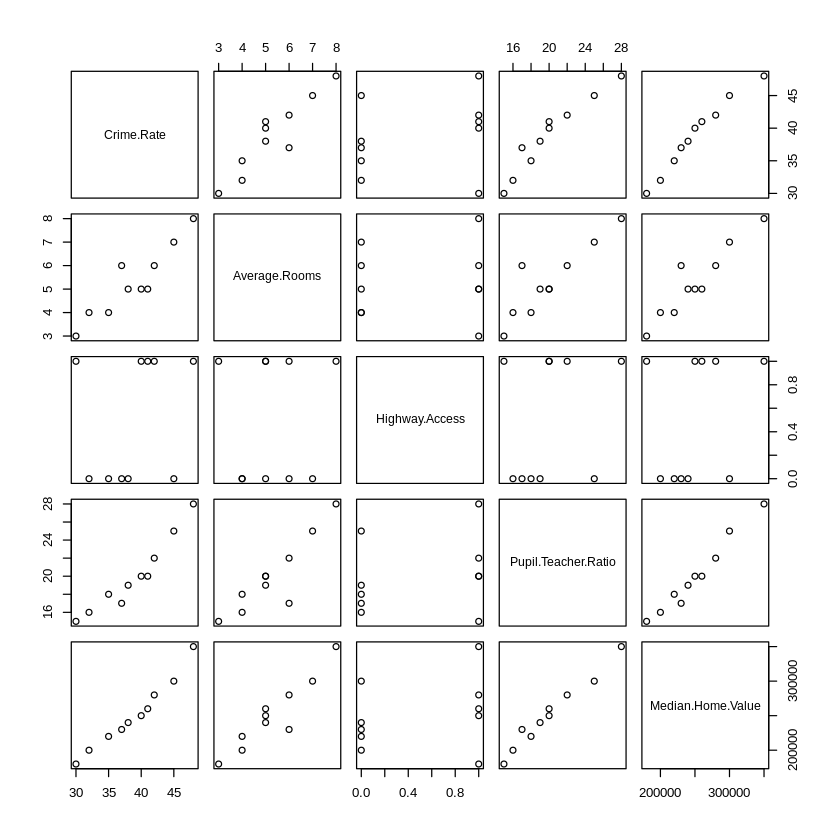

In [16]:
# Visualize the distribution of variables
ggplot(data, aes(x = Median.Home.Value)) +
  geom_histogram(bins = 30, fill = "blue", color = "black") +
  ggtitle("Distribution of Median Home Values")

# Scatter plot matrix
pairs(data[, c("Crime.Rate", "Average.Rooms", "Highway.Access", "Pupil.Teacher.Ratio", "Median.Home.Value")])

# Correlation matrix
correlation_matrix <- cor(data[, c("Crime.Rate", "Average.Rooms", "Highway.Access", "Pupil.Teacher.Ratio", "Median.Home.Value")])
corrplot(correlation_matrix, method = "color")


In [17]:
# Conduct hypothesis testing (e.g., t-test or ANOVA) based on your research questions
# Example: Is there a significant difference in median home values based on the crime rate?

crime_low <- data$Median.Home.Value[data$Crime.Rate < median(data$Crime.Rate)]
crime_high <- data$Median.Home.Value[data$Crime.Rate >= median(data$Crime.Rate)]

t_test_result <- t.test(crime_low, crime_high)
t_test_result


	Welch Two Sample t-test

data:  crime_low and crime_high
t = -3.5686, df = 6.6005, p-value = 0.01005
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -123641.97  -24358.03
sample estimates:
mean of x mean of y 
   214000    288000 



Call:
lm(formula = Median.Home.Value ~ Crime.Rate + Average.Rooms + 
    Highway.Access + Pupil.Teacher.Ratio, data = data)

Residuals:
      1       2       3       4       5       6       7       8       9      10 
-4358.3  3020.5   910.6  1993.8 -3838.2 -7272.7  4123.2  2824.6  3162.7  -566.2 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)  
(Intercept)           -10714      21844  -0.490   0.6446  
Crime.Rate              2479       1359   1.825   0.1277  
Average.Rooms           7406       3504   2.114   0.0882 .
Highway.Access          5210       3894   1.338   0.2384  
Pupil.Teacher.Ratio     6184       1544   4.005   0.0103 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5212 on 5 degrees of freedom
Multiple R-squared:  0.9939,	Adjusted R-squared:  0.989 
F-statistic: 203.9 on 4 and 5 DF,  p-value: 1.01e-05


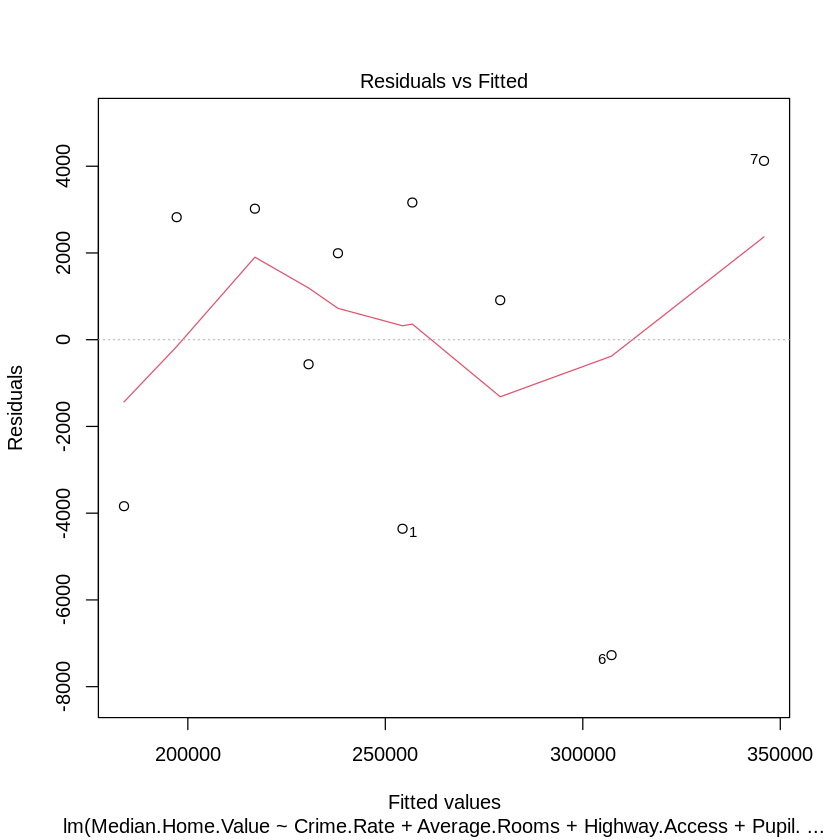

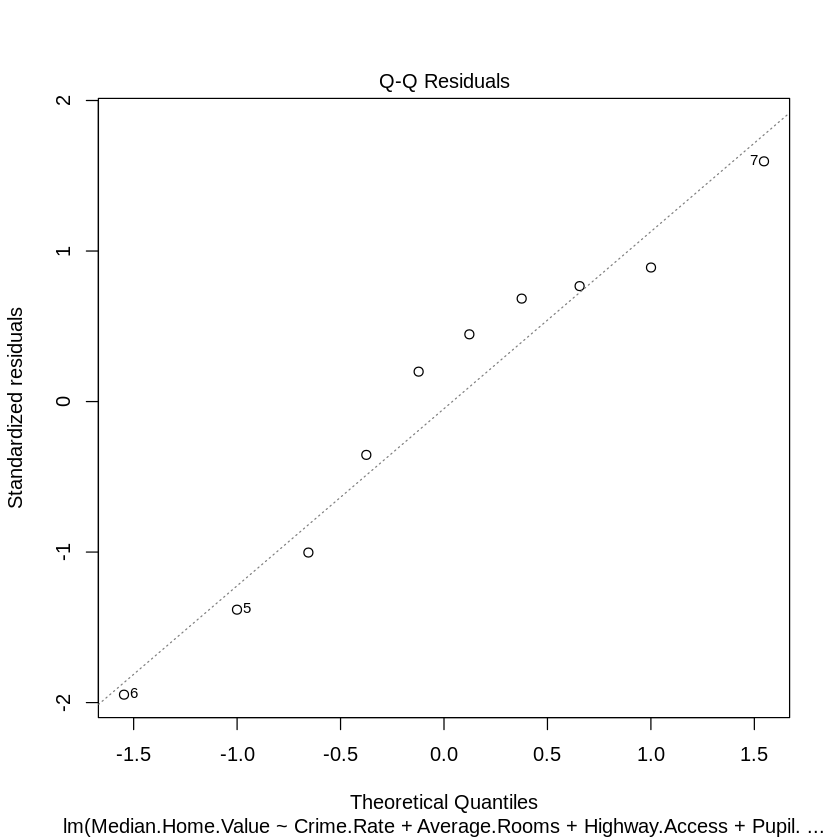

In [18]:
# Fit a simple linear regression model
linear_model <- lm(Median.Home.Value ~ Crime.Rate + Average.Rooms + Highway.Access + Pupil.Teacher.Ratio, data = data)

# Check model summary
summary(linear_model)

# Visualize the regression results
plot(linear_model, which = 1)  # Residuals vs Fitted
plot(linear_model, which = 2)  # Normal Q-Q plot


In [ ]:
# Install and load shiny
install.packages("shiny")
library(shiny)

# Define UI
ui <- fluidPage(
  titlePanel("Housing Market Analysis Dashboard"),
  sidebarLayout(
    sidebarPanel(
      # Add filters or input options if needed
    ),
    mainPanel(
      # Add outputs (plots, tables, etc.)
    )
  )
)

# Define server
server <- function(input, output) {
  # Add server logic for dynamic content
}

# Run the application
shinyApp(ui, server)


In [ ]:
install.packages('rsconnect')